In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [44]:
df = pd.read_csv('products_integrated_features.csv')
df.head()

,url,product_name,brand,category,price,rating,skin_type,total_reviews,skin_concern,ingredients,skin_goal,age,rating_star
0,https://reviews.femaledaily.com/products/bath-...,Overnight Body Serum,BHUMI,Cleanser / Scrub-Exfoliator,Rp. 189.000,4.2,"['combination', 'oily']",17836,"['dryness', 'acne']","['aha', 'hyaluronic acid', 'niacinamide']","['brightening', 'nourishing', 'hydrating', 'to...",25 - 29,4.908163
1,https://reviews.femaledaily.com/products/bath-...,Lulur Natural White Body Scrub,Citra,Cleanser / Scrub-Exfoliator,Rp. 15.000,3.7,"['combination', 'oily']",48240,"['redness', 'dryness', 'acne']","['glycerin', 'aha']","['hydrating', 'smoothing', 'brightening', 'ton...",19 - 24,4.268657
2,https://reviews.femaledaily.com/products/bath-...,Original Body Scrub,Frank,Cleanser / Scrub-Exfoliator,Rp. 220.000,4.1,"['combination', 'oily']",6552,"['acne', 'dryness']","['aha', 'hyaluronic acid', 'niacinamide']",['hydrating'],19 - 24,4.722222
3,https://reviews.femaledaily.com/products/bath-...,Vita Smoothies Body Spa Exfoliating Gel,Hanasui,Cleanser / Scrub-Exfoliator,Rp. 20.000,3.4,"['combination', 'oily']",15159,"['redness', 'dryness']",['aha'],"['smoothing', 'brightening', 'nourishing']",19 - 24,4.118280
4,https://reviews.femaledaily.com/products/bath-...,Vita Smoothies Body Spa Exfoliating Gel,Hanasui,Cleanser / Scrub-Exfoliator,Rp. 20.000,3.3,"['combination', 'normal']",5016,['dryness'],['aha'],"['hydrating', 'brightening']",25 - 29,4.315789


In [45]:
df = df[['skin_type','skin_concern','skin_goal','ingredients']]
df.head()

,skin_type,skin_concern,skin_goal,ingredients
0,"['combination', 'oily']","['dryness', 'acne']","['brightening', 'nourishing', 'hydrating', 'to...","['aha', 'hyaluronic acid', 'niacinamide']"
1,"['combination', 'oily']","['redness', 'dryness', 'acne']","['hydrating', 'smoothing', 'brightening', 'ton...","['glycerin', 'aha']"
2,"['combination', 'oily']","['acne', 'dryness']",['hydrating'],"['aha', 'hyaluronic acid', 'niacinamide']"
3,"['combination', 'oily']","['redness', 'dryness']","['smoothing', 'brightening', 'nourishing']",['aha']
4,"['combination', 'normal']",['dryness'],"['hydrating', 'brightening']",['aha']


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   skin_type     918 non-null    object
 1   skin_concern  918 non-null    object
 2   skin_goal     918 non-null    object
 3   ingredients   918 non-null    object
dtypes: object(4)
memory usage: 28.8+ KB


In [48]:
import ast

def flatten_list(nested_lst):
    flat = []
    for item in nested_lst:
        if isinstance(item, list):
            flat.extend(flatten_list(item))
        else:
            flat.append(item)
    return flat

def parse_and_clean(cell):
    # Kalau tipe string, coba literal_eval ke list Python
    if isinstance(cell, str):
        try:
            lst = ast.literal_eval(cell)
        except:
            # Kalau gagal eval, anggap saja string biasa dan bungkus jadi list
            lst = [cell]
    else:
        lst = cell

    # Flatten nested list (misal list di dalam list)
    flat_list = flatten_list(lst)

    # Split elemen yang masih berupa gabungan string dengan koma
    split_list = []
    for item in flat_list:
        if isinstance(item, str):
            parts = [part.strip() for part in item.split(',')]
            split_list.extend(parts)
        else:
            # Kalau bukan string, langsung masukkan
            split_list.append(str(item).strip())

    # Normalisasi dan hapus duplikat
    seen = set()
    result = []
    for item in split_list:
        item_norm = item.lower()
        if item_norm and item_norm not in seen:
            seen.add(item_norm)
            result.append(item_norm)

    return result

In [49]:
cols = df.columns
for col in cols:
    df[col] = df[col].apply(parse_and_clean)

df.head()

,skin_type,skin_concern,skin_goal,ingredients
0,"[combination, oily]","[dryness, acne]","[brightening, nourishing, hydrating, tone-even...","[aha, hyaluronic acid, niacinamide]"
1,"[combination, oily]","[redness, dryness, acne]","[hydrating, smoothing, brightening, tone-evening]","[glycerin, aha]"
2,"[combination, oily]","[acne, dryness]",[hydrating],"[aha, hyaluronic acid, niacinamide]"
3,"[combination, oily]","[redness, dryness]","[smoothing, brightening, nourishing]",[aha]
4,"[combination, normal]",[dryness],"[hydrating, brightening]",[aha]


In [50]:
# Cek berapa banyak list kosong di tiap kolom
for col in df.columns:
    empty_count = df[col].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()
    print(f"{col}: {empty_count} list kosong")
print()

# Cek jumlah unknown
total = len(df)
for col in cols:
    count = df[col].apply(lambda x: 'unknown' in x).sum()
    percent = count / total * 100
    print(f"{col}: {count} baris ({percent:.2f}%) mengandung 'unknown'")

skin_type: 0 list kosong
skin_concern: 27 list kosong
skin_goal: 45 list kosong
ingredients: 0 list kosong

skin_type: 0 baris (0.00%) mengandung 'unknown'
skin_concern: 0 baris (0.00%) mengandung 'unknown'
skin_goal: 0 baris (0.00%) mengandung 'unknown'
ingredients: 9 baris (0.98%) mengandung 'unknown'


In [51]:
df_cleaned = df[df['ingredients'].apply(lambda x: x != ['unknown'])].reset_index(drop=True)
df_cleaned.head()

,skin_type,skin_concern,skin_goal,ingredients
0,"[combination, oily]","[dryness, acne]","[brightening, nourishing, hydrating, tone-even...","[aha, hyaluronic acid, niacinamide]"
1,"[combination, oily]","[redness, dryness, acne]","[hydrating, smoothing, brightening, tone-evening]","[glycerin, aha]"
2,"[combination, oily]","[acne, dryness]",[hydrating],"[aha, hyaluronic acid, niacinamide]"
3,"[combination, oily]","[redness, dryness]","[smoothing, brightening, nourishing]",[aha]
4,"[combination, normal]",[dryness],"[hydrating, brightening]",[aha]


In [52]:
# Kolom yang ingin dicek
cols = ['skin_concern', 'skin_goal', 'skin_type', 'ingredients']

# Cek berapa banyak list kosong di tiap kolom
for col in cols:
    empty_count = df_cleaned[col].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()
    print(f"{col}: {empty_count} list kosong")
print()

# Cek jumlah unknown
total = len(df_cleaned)
for col in cols:
    count = df_cleaned[col].apply(lambda x: 'unknown' in x).sum()
    percent = count / total * 100
    print(f"{col}: {count} baris ({percent:.2f}%) mengandung 'unknown'")

skin_concern: 27 list kosong
skin_goal: 45 list kosong
skin_type: 0 list kosong
ingredients: 0 list kosong

skin_concern: 0 baris (0.00%) mengandung 'unknown'
skin_goal: 0 baris (0.00%) mengandung 'unknown'
skin_type: 0 baris (0.00%) mengandung 'unknown'
ingredients: 0 baris (0.00%) mengandung 'unknown'


niacinamide: 368 kali
glycerin: 356 kali
aha: 283 kali
bha: 237 kali
retinol: 224 kali
hyaluronic acid: 202 kali
vitamin c: 194 kali
salicylic acid: 178 kali
allantoin: 161 kali
green tea: 120 kali
panthenol: 111 kali
ceramide: 109 kali
zinc: 78 kali
squalane: 58 kali
peptides: 16 kali
azelaic acid: 8 kali


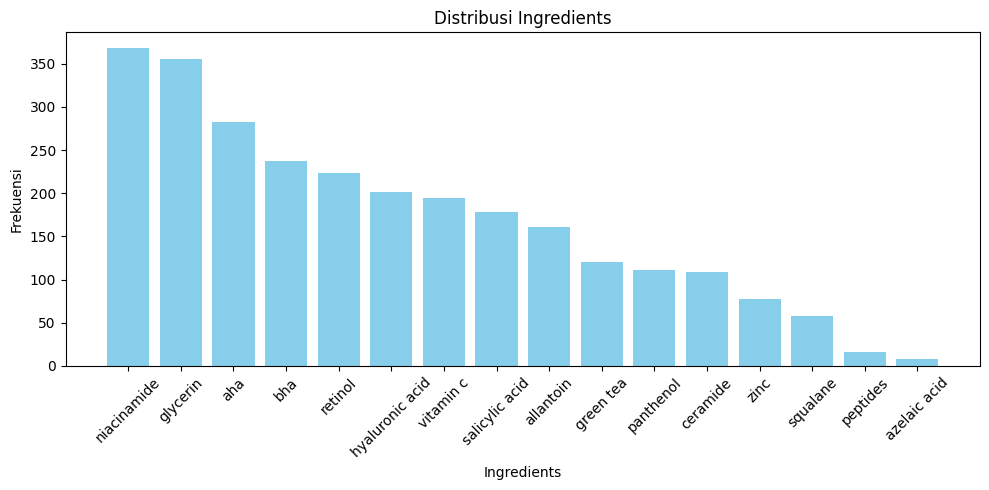

In [53]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten semua ingredients menjadi satu list
all_ingredients = [item for sublist in df_cleaned['ingredients'] for item in sublist]

# Hitung frekuensi kemunculan setiap ingredient
ingredient_counts = Counter(all_ingredients)

# Ambil ingredients yang sering muncul
common_ingredients = ingredient_counts.most_common(50)

for ingredient, count in common_ingredients:
    print(f"{ingredient}: {count} kali")

# Data untuk plot
labels, values = zip(*common_ingredients)

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.title('Distribusi Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Modeling

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential

## Data preparation

In [55]:
# Gabungkan tiga fitur menjadi satu string
df_cleaned['text_input'] = df_cleaned.apply(lambda row: ' '.join(row['skin_type'] + row['skin_concern'] + row['skin_goal']), axis=1)

In [56]:
# Ubah ingredients jadi multi-hot vector
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df_cleaned['ingredients'])

# Simpan daftar semua ingredients (untuk inverse transform nanti)
all_ingredients = mlb.classes_

In [57]:
print(all_ingredients)
print(len(all_ingredients))

['aha' 'allantoin' 'azelaic acid' 'bha' 'ceramide' 'glycerin' 'green tea'
 'hyaluronic acid' 'niacinamide' 'panthenol' 'peptides' 'retinol'
 'salicylic acid' 'squalane' 'vitamin c' 'zinc']
16


In [58]:
from sklearn.model_selection import train_test_split
# train : val : test = 70 : 15 : 15

# Awalnya: split ke train dan temp
X_temp, X_test, y_temp, y_test = train_test_split(df_cleaned['text_input'], y, test_size=0.15, random_state=42)

# Lalu split temp ke train dan val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

# Konversi jadi string array
X_train = X_train.astype(str).to_numpy()
X_val = X_val.astype(str).to_numpy()
X_test = X_test.astype(str).to_numpy()

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(635,)
(137,)
(137,)


In [59]:
# Buat TextVectorization
max_tokens = 1000
sequence_length = 50

vectorizer = TextVectorization(max_tokens=max_tokens, output_sequence_length=sequence_length)
vectorizer.adapt(X_train)

## Build Model

In [60]:
model = Sequential([
    vectorizer,  # preprocessing text
    Embedding(input_dim=max_tokens, output_dim=64),  # bisa dituning
    GlobalAveragePooling1D(),  # atau bisa pakai LSTM
    Dense(128, activation='relu'),
    Dense(len(all_ingredients), activation='sigmoid')  # multi-label output
])

In [61]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [62]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.0558 - loss: 0.6459 - val_accuracy: 0.0219 - val_loss: 0.4857
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1040 - loss: 0.4552 - val_accuracy: 0.1387 - val_loss: 0.4551
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1647 - loss: 0.4229 - val_accuracy: 0.0657 - val_loss: 0.4442
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0922 - loss: 0.4241 - val_accuracy: 0.1387 - val_loss: 0.4453
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1667 - loss: 0.4189 - val_accuracy: 0.0657 - val_loss: 0.4446
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1237 - loss: 0.4197 - val_accuracy: 0.0657 - val_loss: 0.4432
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1311 - loss: 0.4154 - val_accuracy: 0.0657 - val_loss: 0.4446
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0928 - loss: 0.4240 - val_accuracy: 0.0657 - val

## Evaluasi

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
import random

# 1. Prediksi probabilitas
y_pred = model.predict(X_test)

# 2. Konversi ke nilai 0/1 berdasarkan threshold
TRESHOLD = 0.3
y_pred_binary = (y_pred >= TRESHOLD).astype(int)

# 3. Evaluasi model
subset_acc = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='micro')
recall = recall_score(y_test, y_pred_binary, average='micro')
f1 = f1_score(y_test, y_pred_binary, average='micro')
hamming = hamming_loss(y_test, y_pred_binary)

# 4. Tampilkan hasil
print("📊 Evaluasi Model Multi-Label Classification")
print("Subset Accuracy :", subset_acc)
print("Precision        :", precision)
print("Recall           :", recall)
print("F1 Score         :", f1)
print("Hamming Loss     :", hamming)

# Uji prediksi satu sample acak
# Ambil index acak dari data uji
index = random.randint(0, len(X_test) - 1)

# Prediksi biner untuk sample tersebut
sample_pred = np.array([y_pred_binary[index]])
sample_true = np.array([y_test[index]])

# Konversi ke bentuk label ingredients
predicted_ingredients = mlb.inverse_transform(sample_pred)[0]
actual_ingredients = mlb.inverse_transform(sample_true)[0]

# Ambil fitur input aslinya dari X_test_text (sebelum vektorisasi)
input_text = X_test[index]  # Asumsinya kamu menyimpan text asli sebelum tokenizer di X_test_text

print("\nContoh Prediksi dengan Index Acak:", index)
print("Input:")
print(input_text)
print("\nPredicted Ingredients:", predicted_ingredients)
print("Actual Ingredients   :", actual_ingredients)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
📊 Evaluasi Model Multi-Label Classification
Subset Accuracy : 0.0
Precision        : 0.3925233644859813
Recall           : 0.2889908256880734
F1 Score         : 0.332892998678996
Hamming Loss     : 0.2303832116788321

Contoh Prediksi dengan Index Acak: 126
Input:
combination oily pores dryness acne glowing refreshing brightening pore-minimizing plumping hydrating

Predicted Ingredients: ('glycerin', 'niacinamide')
Actual Ingredients   : ('aha', 'glycerin', 'niacinamide')


## Inference Model

In [64]:
def predict_ingredients(skin_type_list, skin_concern_list, skin_goal_list, model, mlb, threshold=0.5):
    """
    Fungsi untuk prediksi ingredients berdasarkan input user.

    Parameters:
        skin_type_list: list of str
        skin_concern_list: list of str
        skin_goal_list: list of str
        model: model TensorFlow yang sudah dilatih
        mlb: MultiLabelBinarizer yang sudah dilatih
        threshold: float, default 0.5

    Returns:
        List of predicted ingredients
    """
    # Gabungkan input menjadi satu string seperti pada preprocessing
    text_input = ' '.join(skin_type_list + skin_concern_list + skin_goal_list)

    # Konversi jadi array string NumPy
    text_array = np.array([text_input], dtype=object)

    # Prediksi probabilitas
    pred_probs = model.predict(text_array)

    # Threshold → multi-label biner
    pred_binary = (pred_probs >= threshold).astype(int)

    # Decode kembali ke label ingredients
    predicted_labels = mlb.inverse_transform(pred_binary)[0]

    return predicted_labels

In [65]:
# Input user (bisa dikosongkan sebagian)
skin_type_input = ['dry','combination']
skin_concern_input = ['acne','redness','oiliness']
skin_goal_input = ['hydrating', 'brightening']

predicted = predict_ingredients(
    skin_type_input,
    skin_concern_input,
    skin_goal_input,
    model=model,
    mlb=mlb,
    threshold=0.2
)

print("🔮 Predicted Ingredients:", predicted)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
🔮 Predicted Ingredients: ('aha', 'bha', 'glycerin', 'niacinamide', 'retinol', 'vitamin c')
